<a href="https://colab.research.google.com/github/Felipeixotont/Support_Vector_Machine_Tutorial/blob/master/Support_Vector_Machine_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SUPPORT VECTOR MACHINE - SVM**

Nesse tutorial iremos aprender os conceitos básicos do SVM e veremos uma aplicação desse algorítmo em um caso linearmente separável utilizando o Dataset Iris. 

#**História**


Support Vector Machine (SVM) é uma técnica de aprendizagem de máquina usada para classificação, regressão e reconhecimento de padrões (mais utilziada para classificação). O SVM teve início já em 1979 por **Vladimir Naumovich Vapnik** (matemático Soviético-Estadunidense) junto com o desenvolvimento da teoria de aprendizagem estatística e posteriormente aprimorado por ele e Corinna Cortes então engenheiros da AT&T Bell Labs em 1995 (ano em que o algorítmo ganhou esse nome). O algorítmo só ganhou esse nome após ser introduzido condições na sua fase de treinamento que o permitia classificar dados mesmo quando essa separação envolvesse eventuais erros (pontos de observações fora da margem ou até violando o Hiperplano).

Usado em várias aplicações como detecção facial, classificação de emails, classificação de genes, reconhecimento de escrita a mão entre outros, o SVM é um algoritmo de aprendizado supervisionado, que tem como objetivo separar dados (pontos de observação) linearmente em duas classes traçando um hiperplano ótimo, ainda que esses dados não sejam linearmente separáveis. Observe o gráfico a seguir:




![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)



Note que existem pontos azuis e pontos verdes separados por uma reta. Os pontos são os Dados e suas cores representam a sua classe, a reta vermelha que os separam é o Hiperplano e a linha tracejada chama-se Margem. 

Todos os pontos de observação que aparecerem em um lado da reta vermelha serão rotulados como a primeira classe e, todos os outros pontos que aparecerem do lado oposto da primeira classe separada pelo hiperplano serão rotulados como segunda classe. 

A partir do momento que os dados podem ser separados por hiperplanos, podemos obter diferentes hiperplanos de diferentes angulos, mas, o objetivo é achar o hiperplano que consegue separar melhor as classes. O SVM calcula a distância perpendicular dos pontos de observação em relação aos hiperplanos obtendo as margens e a partir daí ele escolhe um Hiperplano com a maior margem para ser mais robusto, após achar esse Hiperplano, os pontos que estiverem mais próximos dele serão os pontos que definirão a margem. Esses pontos que estão mais próximos do Hiperplano são chamados de vetores de suporte e os vetores de suportes são encontrados durante a fase de treinamento, porém, essa configuração pode ser alterada.

O SVM possúi um parâmetro **C** que dita como será construída a margem que separa as classes, mas vale ressaltar que deve ser usado conscientemente, pois dependendo do valor que você passe para o parâmetro pode fazer com que ele seja mais tolerante a erros (dados violando a margem e hiperplano). 


# Hard-Margin e Soft-Margin

Ao longo dos anos o SVM passou por melhorias, atualmente possui duas versões que são a **Hard-Margin** e **Soft-Margin**, sendo a Soft-Margin a atual. 
A diferença entre essas duas versões é que a Hard-Margin é bem limitada, pois só era possível separar os dados linearmente, sem contar que não permitia erros de classificação, ruídos etc.
Com o objetivo de melhorar essas limitações, Cortes e Vapnik propuseram uma melhoria no algorítmo Hard-Margin, afim de poder utilizá-lo para casos onde os dados não fossem linearmente separáveis também. Essa melhoria ficou conhecida como Soft-Margin.

#Separação Não linear

Vimos a pouco um exemplo de separação linear, mas e quando os dados não são linearmente separáveis?
Observe bem quando isso acontece:




![alt text](https://www.researchgate.net/profile/Marcelo_Fernandes4/publication/309477255/figure/fig11/AS:670336479686679@1536832079592/Figura-2-Conjunto-de-dados-nao-linearmente-separavel.ppm)


Observando a figura (a) é visível que não se pode separar esses dados em duas classes linearmente e para isso foi desenvolvido um "truque" para que pudesse mapear esses dados em uma outra dimensão.
Esse "truque" da imagem (b) é chamado de Kernel (que são um conjunto de funções matemáticas). Esse é o grande segredo do SVM, a função de Kernel básicamente adiciona uma dimensão ao plano, fazendo com que seja possível traçar um Hiperplano ótimo separando os dados em duas classes da mesma maneira que é feita quando é possível separar linearmente, maximizando as bordas entre as duas classes e os pontos que ajudam a obter esse hiperplano ótimo são chamados também de vetores de suporte.

#**Aplicando o SVM**

Vimos os conceitos básicos principais do que é o Support Vector Machine, a seguir, vamos aplicar esse conceito em um modelo que iremos criar utilizando o Dataset **Iris** (um dos melhores databases para reconhecimento de padrões) do Scikit-learn e veremos um exemplo linearmente separável.

#Mãos a obra
Para começar, iremos importar do Scikit-Learn os seus datasets, importaremos a biblioteca pandas para criar um dataframe com base nos nossos dados e utilizaremos a biblioteca Seaborn para visualizar os dados (ela atua em cima da Matplotlib, porém possui vários outros padrões de visualização que podem ser melhores para determinados gráficos). Sem mais delongas, confira o código a seguir:


In [4]:
#importando os datasets do scikit-learn e as bibliotecas que iremos utilizar
from sklearn import datasets
import pandas as pd  
import seaborn as sns 

#carregamos o dataset iris
iris = datasets.load_iris() 

# transformamos em um pandas dataframe para visualizar na forma de gráfico e dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  
#adicionando a coluna rótulo e Espécie da classificação
#A coluna rótulo é a numeração que define qual espécie de Iris ela é
#Sendo 0 para Setosa, 1 para Versicolor e 2 para Virginica
iris_df ['rótulo'] = iris.target 
iris_df['Espécie'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#imprimindo o Dataframe
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),rótulo,Espécie
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Na visualização do dataframe, cada linha é uma Iris diferente, sendo que o o Dataset do Iris possuí 150 amostras como mostrado embaixo do Dataframe. Podemos observar que temos 4 features sem ser as 2 últimas que adicionamos (features são as caracteristicas, as colunas do dataframe, que no caso são tamanho e largura da Sepala e tamanho e largura da Petala). Criaremos agora um gráfico para melhor visualizar nossos dados:

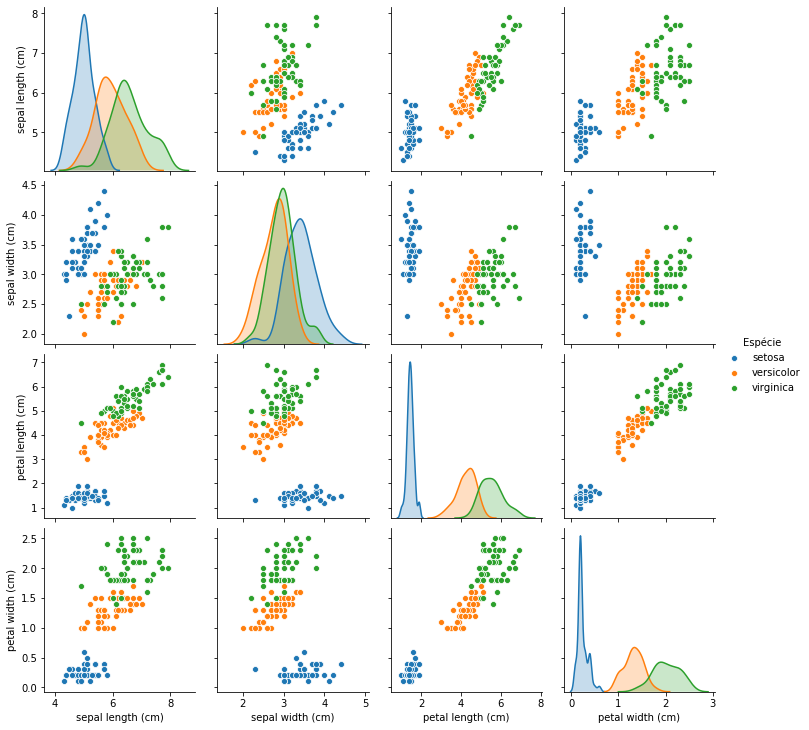

In [5]:
sns.pairplot(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
'petal width (cm)', 'Espécie']], hue='Espécie')

Plotamos um gráfico em pares através da função sns.pairplot, separando as caracteristicas por linhas e colunas. As cores definem qual Iris estão sendo tratadas.

Observando esses gráficos que montamos, podemos analisar que esses dados são sim linearmente separáveis quando observamos de duas a duas caracteristicas, e a partir de agora vamos então utilizar o SVM para poder fazer essa classificação.

Primeiro, vamos separar nossos dados em dados de treino e dados de teste:

In [0]:
from sklearn import svm 
# importamos o módulo de divisão de treino e teste
from sklearn.model_selection import train_test_split 

#como já carregamos o dataset lá em cima, não será preciso fazer isso de novo.
x = iris.data 
y = iris.target

#agora vamos fazer a divisão entre treinamento e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3, random_state = 13)

Vale ressaltar que separamos 70% dos dados para treino. Esses dados para treino serão utilizados para ensinar o código a fazer predições. Os outros 30% ficam com os dados de teste, que são dados que o nosso algorítmo não viu ainda que servirá como base para sabermos se ele foi capaz de prever corretamente qual o tipo de Íris. Os dados são separados aleatoriamente afim de não ter problemas na hora de fazer a predição.
Agora vamos criar nosso classificador a seguir:

In [7]:
#Como vimos antes, C é o parâmetro que define a nossa margem e é definido igual a 1 por padrão.
#Quanto maior for o valor de C, maior vai ser a nossa margem.
clf = svm.SVC(C=1.2)                        

#treinando o modelo usando os dados de treinamento: 
clf.fit(x_treinamento,y_treinamento)

SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Pronto! Após criar e treinar o classificador, vamos agora fazer a predição:

In [11]:
clf.predict(x_teste)

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2])

Após fazer a predição, nosso classificador nos retorna as classes para o conjunto de teste. Nós passamos para ele as caracteristicas e os dados de teste, que no caso foram 30% dos dados e ele nos retornou qual é a classe com base em cada uma daquelas caracteristicas. Então vamos medir a acurácia pra ver se está correto:

In [0]:
clf.score(x_teste,y_teste)

E é isso! Obtivemos 95% de acurácia. 

Baseado nesse exemplo, é perceptível o quão útil é o SVM para classificações lineares, com a acuracia perfeita por assim dizer de 95% de score. Vimos então na teoria quem foram os responsáveis por criar o SVM e a ideia por trás dele, vimos também como funciona um modelo SVM e fizemos uma aplicação para classificar o conjunto de dados Iris. 